In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_listings.csv')

In [3]:
df.head()

,id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,2454,60,0,1.0,1.0,1,0,1,2,1.0,...,0,0,0,0,0,0,0,1,0,0
1,2539,100,0,8.0,8.0,1,1,0,4,1.0,...,0,0,1,0,0,0,0,1,1,0
2,2595,60,0,5.0,5.0,1,1,0,2,1.0,...,0,0,0,0,0,0,0,1,0,1
3,3330,100,0,4.0,4.0,1,1,1,2,1.0,...,0,0,1,0,0,0,0,1,0,1
4,3647,100,0,1.0,1.0,1,1,1,2,1.0,...,0,0,1,0,0,0,1,0,0,1


In [6]:
df.columns

Index(['id', 'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calcu

In [11]:
df.drop(['id'],axis=1,inplace=True)

In [13]:
df_array = df.values

In [14]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(df_array)
df_scaled = scalar.transform(df_array)

In [39]:
#importing PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
model = pca.fit(df_array)
df_reduced= pca.transform(df_array)


In [40]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    
    return ax

In [41]:
pca.explained_variance_ratio_

array([9.99999993e-01, 3.65737530e-09])

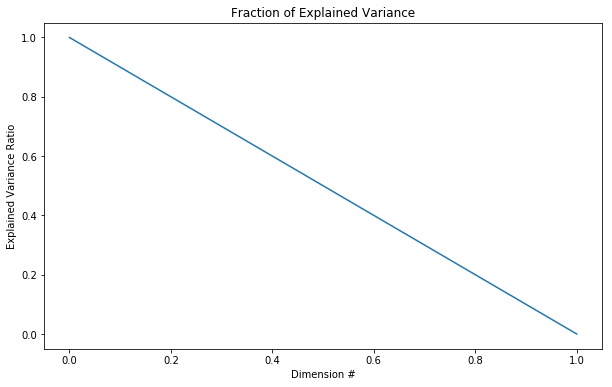

In [42]:
plot_scaled_variance(model)

In [43]:
df_reduced

array([[-86986.53104228,   -840.26647574],
       [-86986.53106549,   -846.32182928],
       [-86196.53114551,   -878.1428316 ],
       ...,
       [-88086.53158471,   2466.17907844],
       [-88432.53161337,   2227.05903618],
       [-86196.53169811,   2382.01811583]])

(50220, 2)
[[ 27.668415     1.7239186 ]
 [  3.2440765   -4.9107904 ]
 [ 27.687744     1.7260554 ]
 [ -0.62205815 -39.182285  ]
 [ 27.685293     1.7256767 ]
 [-26.55976      2.5867212 ]
 [  4.7297344   30.851994  ]
 [ 27.68436      1.7255619 ]
 [  4.7322297   30.949017  ]]


NameError: name 'companies' is not defined

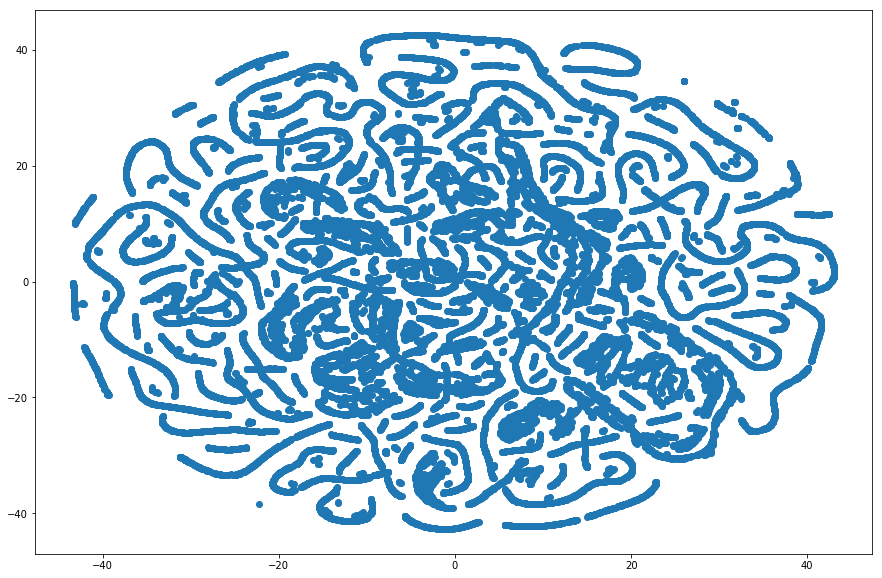

In [44]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=50)
Tsne_transformed=model.fit_transform(df_reduced)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(15, 10)) 
plt.scatter(xs,ys)
for i in range(0,len(companies)):
    plt.annotate(companies[i],(xs[i],ys[i]))
plt.show()